In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_context('paper')
sns.set(font_scale=1.2)

- BenchmarkDotNet=v0.12.0,
- OS=ubuntu 18.04
- Intel Core i5-3230M CPU 2.60GHz (Ivy Bridge), 1 CPU, 4 logical and 2 physical cores
- .NET Core SDK=3.0.102
  [Host]     : .NET Core 3.0.2 (CoreCLR 4.700.19.57202, CoreFX 4.700.19.57708), X64 RyuJIT
 

In [4]:
def shell_CS_teor(count):
    return np.ceil(count ** (6/5))

def insertion_CS_teor(count):
    return np.ceil(count * (count - 1) / 2)

def teor_time(method, count):
    power = {
        "Insertion" : 2,
        "Shell" : 2,
        "Hibbard" : 3/2,
        "Knuth" : 6/5
    }
    return count ** power[method]

In [5]:
shell = pd.read_csv("tests/Benchmarks/results/Bencmarks.ShellSortBenchmark-report.csv", usecols = ['Method', 'Mean', 'count'])
shell.columns = ['Type', 'Count', 'Time']
shell['Time'].replace(regex=True,inplace=True,to_replace=r',',value=r'')
#shell['Error'].replace(regex=True,inplace=True,to_replace=r',',value=r'')
#shell['StdDev'].replace(regex=True,inplace=True,to_replace=r',',value=r'')
shell['Time'] = shell['Time'].str[:-3].astype('float')
#shell['Error'] = shell['Error'].str[:-3].astype('float')
#shell['StdDev'] = shell['StdDev'].str[:-3].astype('float')
shell['Type'] = shell.apply(lambda row : row['Type'][9:-8], axis = 1)
shell.sort_values(by=['Type', 'Count'], inplace = True)
shell.reset_index(drop = True)

,Type,Count,Time
0,Hibbard,100,7.070
1,Hibbard,1000,93.604
2,Hibbard,10000,1332.339
3,Knuth,100,5.984
4,Knuth,1000,85.807
5,Knuth,10000,1265.874
6,Shell,100,7.276
7,Shell,1000,100.005
8,Shell,10000,1373.195


In [6]:
insertion = pd.read_csv("tests/Benchmarks/results/Bencmarks.InsertionSortBenchmark-report.csv", usecols = ['Method', 'Mean', 'count'])

insertion.columns = ['Type', 'Count', 'Time']
insertion['Time'].replace(regex=True,inplace=True,to_replace=r',',value=r'')
insertion['Time'] = insertion['Time'].str[:-3].astype('float')
insertion['Type'] = 'Insertion'
insertion.sort_values(by=['Type', 'Count'], inplace = True)
insertion.reset_index(drop = True)

,Type,Count,Time
0,Insertion,100,1.182
1,Insertion,1000,12.095
2,Insertion,10000,117.593


In [7]:
knuthOps = pd.read_csv("tests/Benchmarks/results/KnuthOperation.csv", names=['Count', 'C', 'S'])
knuthOps['Type'] = 'Knuth'

shellOps = pd.read_csv("tests/Benchmarks/results/ShellOperation.csv", names=['Count', 'C', 'S'])
shellOps['Type'] = 'Shell'

hibbardOps = pd.read_csv("tests/Benchmarks/results/HibbardOperation.csv", names=['Count', 'C', 'S'])
hibbardOps['Type'] = 'Hibbard'

insertionOps = pd.read_csv("tests/Benchmarks/results/InsertionOperation.csv", names=['Count', 'C', 'S'])
insertionOps['Type'] = 'Insertion'

In [8]:
shellOps = pd.concat([hibbardOps, knuthOps, shellOps], ignore_index=True)
ops = pd.concat([shellOps, insertionOps], ignore_index=True)
ops

,Count,C,S,Type
0,100,766,348,Hibbard
1,1000,14908,7465,Hibbard
2,10000,239471,131070,Hibbard
3,100,736,340,Knuth
4,1000,15050,7981,Knuth
5,10000,242176,135454,Knuth
6,100,849,400,Shell
7,1000,15131,7627,Shell
8,10000,264907,150010,Shell
9,100,2652,2556,Insertion


In [9]:
times = shell.append(insertion, ignore_index=True)
summary = times.merge(ops, how='left', on=['Type', 'Count'])
summary

,Type,Count,Time,C,S
0,Hibbard,100,7.070,766,348
1,Hibbard,1000,93.604,14908,7465
2,Hibbard,10000,1332.339,239471,131070
3,Knuth,100,5.984,736,340
4,Knuth,1000,85.807,15050,7981
5,Knuth,10000,1265.874,242176,135454
6,Shell,100,7.276,849,400
7,Shell,1000,100.005,15131,7627
8,Shell,10000,1373.195,264907,150010
9,Insertion,100,1.182,2652,2556


**Time comparation**

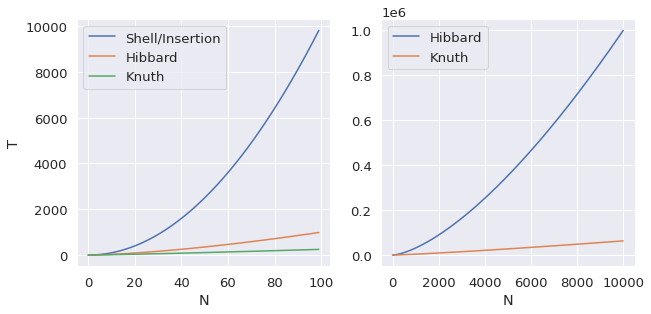

In [10]:
x = np.arange(0, 100)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.xlabel("N")
plt.ylabel("T")

sns.lineplot(x, x**2, label = "Shell/Insertion");
sns.lineplot(x, x**(3/2), label = "Hibbard");
sns.lineplot(x, x**(6/5), label = "Knuth");

plt.subplot(2, 2, 2)
plt.xlabel("N")

x = np.arange(0,10000)
sns.lineplot(x, x**(3/2), label = "Hibbard");
sns.lineplot(x, x**(6/5), label = "Knuth");

/home/shov/PyEnvs/DataScience/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


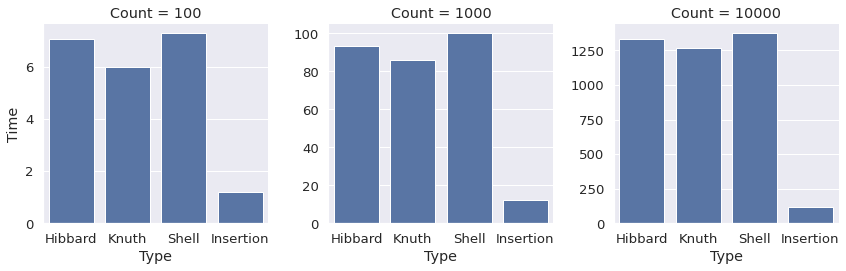

In [11]:
g = sns.FacetGrid(col = 'Count', data=summary, sharey=False, height = 4);
g = g.map(sns.barplot, 'Type', 'Time');

In [12]:
summary['TeorTime'] = summary.apply(lambda row: teor_time(row['Type'], row['Count']), axis=1)
summary['TimeRatio'] = summary['Time'] / summary['TeorTime']
summary

,Type,Count,Time,C,S,TeorTime,TimeRatio
0,Hibbard,100,7.070,766,348,1.000000e+03,0.007070
1,Hibbard,1000,93.604,14908,7465,3.162278e+04,0.002960
2,Hibbard,10000,1332.339,239471,131070,1.000000e+06,0.001332
3,Knuth,100,5.984,736,340,2.511886e+02,0.023823
4,Knuth,1000,85.807,15050,7981,3.981072e+03,0.021554
5,Knuth,10000,1265.874,242176,135454,6.309573e+04,0.020063
6,Shell,100,7.276,849,400,1.000000e+04,0.000728
7,Shell,1000,100.005,15131,7627,1.000000e+06,0.000100
8,Shell,10000,1373.195,264907,150010,1.000000e+08,0.000014
9,Insertion,100,1.182,2652,2556,1.000000e+04,0.000118


In [13]:
summary.groupby('Type').mean()['TimeRatio']

Type
Hibbard      0.003787
Insertion    0.000044
Knuth        0.021813
Shell        0.000280
Name: TimeRatio, dtype: float64

In [33]:
summary.groupby('Type').std()['TimeRatio']

Type
Hibbard      0.002957
Insertion    0.000065
Knuth        0.001893
Shell        0.000390
Name: TimeRatio, dtype: float64

**Comparation counts**

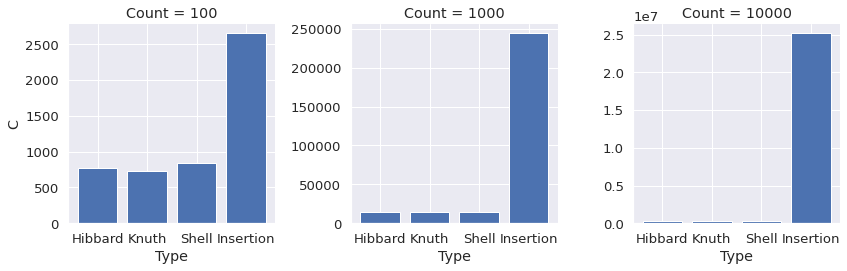

In [14]:
g = sns.FacetGrid(summary, col='Count', sharey=False, height=4);
g = g.map(plt.bar, 'Type', 'C');

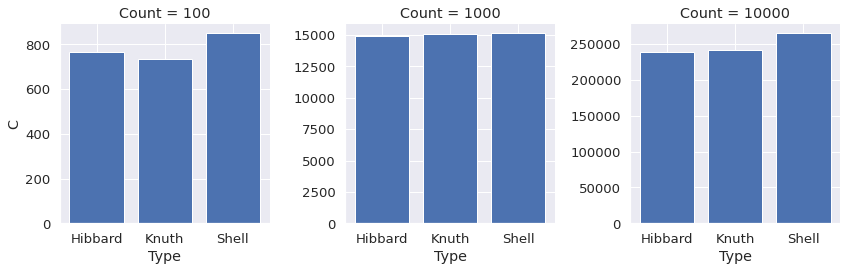

In [15]:
g = sns.FacetGrid(shellOps, col='Count', sharey=False, height=4)
g = g.map(plt.bar, 'Type', 'C');

In [16]:
summary['CTeor'] = summary.apply(lambda row: insertion_CS_teor(row['Count']) if row['Type'] == "Insertion" else shell_CS_teor(row['Count']), axis = 1)
summary['CTeor'] =  summary['CTeor'].astype('int')
summary['CRatio'] = summary['C'] / summary['CTeor']
summary

,Type,Count,Time,C,S,TeorTime,TimeRatio,CTeor,CRatio
0,Hibbard,100,7.070,766,348,1.000000e+03,0.007070,252,3.039683
1,Hibbard,1000,93.604,14908,7465,3.162278e+04,0.002960,3982,3.743847
2,Hibbard,10000,1332.339,239471,131070,1.000000e+06,0.001332,63096,3.795344
3,Knuth,100,5.984,736,340,2.511886e+02,0.023823,252,2.920635
4,Knuth,1000,85.807,15050,7981,3.981072e+03,0.021554,3982,3.779508
5,Knuth,10000,1265.874,242176,135454,6.309573e+04,0.020063,63096,3.838215
6,Shell,100,7.276,849,400,1.000000e+04,0.000728,252,3.369048
7,Shell,1000,100.005,15131,7627,1.000000e+06,0.000100,3982,3.799849
8,Shell,10000,1373.195,264907,150010,1.000000e+08,0.000014,63096,4.198475
9,Insertion,100,1.182,2652,2556,1.000000e+04,0.000118,4950,0.535758


In [26]:
summary.groupby('Type').mean()['CRatio']

Type
Hibbard      3.526291
Insertion    0.509292
Knuth        3.512786
Shell        3.789124
Name: CRatio, dtype: float64

In [34]:
summary.groupby('Type').std()['CRatio']

Type
Hibbard      0.422201
Insertion    0.024097
Knuth        0.513657
Shell        0.414818
Name: CRatio, dtype: float64

**Swaps couns**

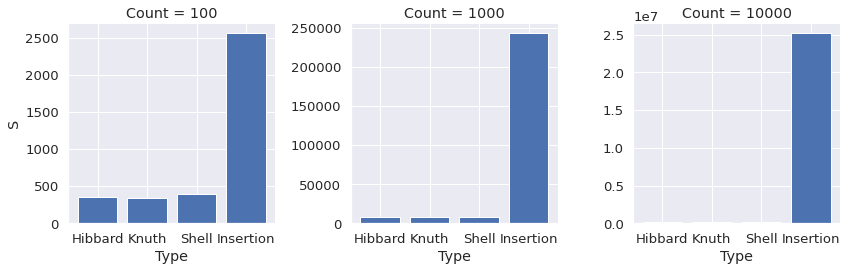

In [18]:
g = sns.FacetGrid(summary, col="Count", sharey=False, height=4)
g.map(plt.bar, "Type", "S");

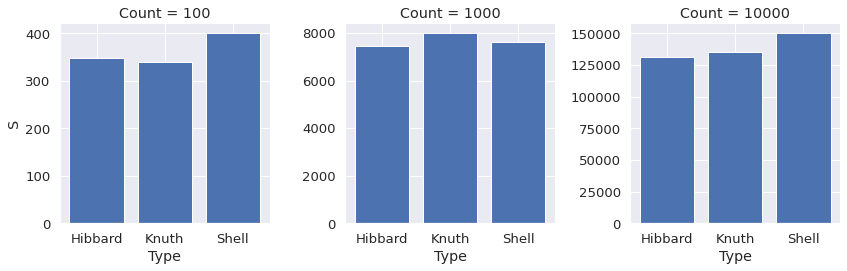

In [19]:
g = sns.FacetGrid(shellOps, col='Count', sharey=False, height=4)
g = g.map(plt.bar, 'Type', 'S');

In [20]:
summary['STeor'] = summary.apply(lambda row: insertion_CS_teor(row['Count']) if row['Type'] == "Insertion" else shell_CS_teor(row['Count']), axis = 1)
summary['STeor'] =  summary['STeor'].astype('int')
summary['SRatio'] = summary['S'] / summary['STeor']
summary

,Type,Count,Time,C,S,TeorTime,TimeRatio,CTeor,CRatio,STeor,SRatio
0,Hibbard,100,7.070,766,348,1.000000e+03,0.007070,252,3.039683,252,1.380952
1,Hibbard,1000,93.604,14908,7465,3.162278e+04,0.002960,3982,3.743847,3982,1.874686
2,Hibbard,10000,1332.339,239471,131070,1.000000e+06,0.001332,63096,3.795344,63096,2.077311
3,Knuth,100,5.984,736,340,2.511886e+02,0.023823,252,2.920635,252,1.349206
4,Knuth,1000,85.807,15050,7981,3.981072e+03,0.021554,3982,3.779508,3982,2.004269
5,Knuth,10000,1265.874,242176,135454,6.309573e+04,0.020063,63096,3.838215,63096,2.146792
6,Shell,100,7.276,849,400,1.000000e+04,0.000728,252,3.369048,252,1.587302
7,Shell,1000,100.005,15131,7627,1.000000e+06,0.000100,3982,3.799849,3982,1.915369
8,Shell,10000,1373.195,264907,150010,1.000000e+08,0.000014,63096,4.198475,63096,2.377488
9,Insertion,100,1.182,2652,2556,1.000000e+04,0.000118,4950,0.535758,4950,0.516364


In [21]:
summary.groupby('Type').mean()['SRatio']

Type
Hibbard      1.777650
Insertion    0.502100
Knuth        1.833423
Shell        1.960053
Name: SRatio, dtype: float64

In [35]:
summary.groupby('Type').std()['SRatio']

Type
Hibbard      0.358177
Insertion    0.014900
Knuth        0.425355
Shell        0.396984
Name: SRatio, dtype: float64